<a href="https://colab.research.google.com/github/c4dr-me/ml-01/blob/main/techproj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
!pip install opencv-python mediapipe flask tensorflow


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 35.7/35.7 MB 44.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 294.6/294.6 kB 22.8 MB/s eta 0:00:00
  Attempting uninstall: protobuf
    Found existing installation: protobuf 3.20.3
    Uninstalling protobuf-3.20.3:
      Successfully uninstalled protobuf-3.20.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
tensorflow-metadata 1.15.0 requires protobuf<4.21,>=3.20.3; python_version < "3.11", but you have protobuf 4.25.4 which is incompatible.


In [11]:
import cv2
import os

# Create a folder to store frames
os.makedirs('frames', exist_ok=True)

def extract_frames(video_path, output_folder, frame_rate=1):
    cap = cv2.VideoCapture(video_path)
    frame_id = 0
    while True:
        ret, frame = cap.read()
        if not ret:
            break
        if frame_id % frame_rate == 0:
            # Save the frame as an image file
            frame_name = os.path.join(output_folder, f'frame_{frame_id}.jpg')
            cv2.imwrite(frame_name, frame)
        frame_id += 1
    cap.release()

# Extract frames from each uploaded video
for video in os.listdir('/content/'):
    if video.endswith('.mp4'):
        extract_frames(video, 'frames')


In [12]:
import cv2
import mediapipe as mp
import os

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def detect_pose(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and detect poses
    results = pose.process(image_rgb)

    # Draw pose landmarks on the image
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image, results.pose_landmarks

# Path to the directory containing frames
frames_directory = '/content/frames'
output_directory = '/content/processed_frames'

# Create output directory if it doesn't exist
if not os.path.exists(output_directory):
    os.makedirs(output_directory)

# Loop through all images in the directory and save processed images
for filename in os.listdir(frames_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(frames_directory, filename)

        # Read the image
        image = cv2.imread(image_path)

        # Detect pose in the image
        pose_image, landmarks = detect_pose(image)

        # Save the processed image
        output_path = os.path.join(output_directory, filename)
        cv2.imwrite(output_path, pose_image)

print(f"Processed images saved in {output_directory}")


/usr/local/lib/python3.10/dist-packages/google/protobuf/symbol_database.py:55: UserWarning: SymbolDatabase.GetPrototype() is deprecated. Please use message_factory.GetMessageClass() instead. SymbolDatabase.GetPrototype() will be removed soon.
  warnings.warn('SymbolDatabase.GetPrototype() is deprecated. Please '


Processed images saved in /content/processed_frames


In [13]:
import cv2
import mediapipe as mp
import os
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def extract_keypoints(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and extract pose landmarks
    results = pose.process(image_rgb)

    # Extract keypoints (x, y) for each landmark
    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y])  # Extract x, y coordinates

    return keypoints

# Path to the directory containing processed frames
processed_frames_directory = '/content/processed_frames'

# Initialize lists to hold features (X) and labels (y)
X = []
y = []

# Define your labels (e.g., manually label each image based on filename)
# Example: Let's assume images containing 'block' in their filename are labeled as 'block', and so on.
for filename in os.listdir(processed_frames_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(processed_frames_directory, filename)

        # Read the processed image
        image = cv2.imread(image_path)

        # Extract keypoints
        keypoints = extract_keypoints(image)

        if keypoints:  # Ensure keypoints were detected
            X.append(keypoints)

            # Assign a label based on filename
            if 'block' in filename:
                y.append('block')
            elif 'punch' in filename:
                y.append('punch')
            elif 'kick' in filename:
                y.append('kick')
            # Add more actions and labels as needed

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Number of samples: {len(X)}")


Number of samples: 226


In [14]:
import cv2
import mediapipe as mp
import os
import numpy as np

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()

def extract_keypoints(image):
    """
    Extracts pose keypoints (x, y) from an image using MediaPipe.
    Returns a flattened list of keypoints if pose is detected, otherwise returns None.
    """
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and extract pose landmarks
    results = pose.process(image_rgb)

    # Extract keypoints (x, y) for each landmark
    keypoints = []
    if results.pose_landmarks:
        for landmark in results.pose_landmarks.landmark:
            keypoints.extend([landmark.x, landmark.y])  # Flatten the x, y coordinates

        return keypoints
    else:
        return None  # Return None if no landmarks are detected

# Path to the directory containing processed frames
processed_frames_directory = '/content/processed_frames'

# Initialize lists to hold features (X) and labels (y)
X = []
y = []

# Define your action labels and their criteria based on filenames
action_labels = {
    'block': 'block',
    'punch': 'punch',
    'kick': 'kick',
    # Add more actions and labels as needed
}

# Loop through all files in the processed frames directory
for filename in os.listdir(processed_frames_directory):
    if filename.endswith(".jpg") or filename.endswith(".png"):
        image_path = os.path.join(processed_frames_directory, filename)

        # Read the processed image
        image = cv2.imread(image_path)

        # Extract keypoints from the image
        keypoints = extract_keypoints(image)

        if keypoints:  # Ensure keypoints were detected
            X.append(keypoints)

            # Assign a label based on filename by checking the defined action labels
            label_assigned = False
            for action, label in action_labels.items():
                if action in filename.lower():
                    y.append(label)
                    label_assigned = True
                    break

            # If no label matches, you can choose to skip or assign a default label
            if not label_assigned:
                print(f"Warning: No label found for file '{filename}'. Skipping this sample.")
        else:
            print(f"Warning: No keypoints detected in file '{filename}'. Skipping this sample.")

# Convert X and y to NumPy arrays
X = np.array(X)
y = np.array(y)

print(f"Number of samples: {len(X)}")
print(f"Number of labels: {len(y)}")


Number of samples: 226
Number of labels: 0


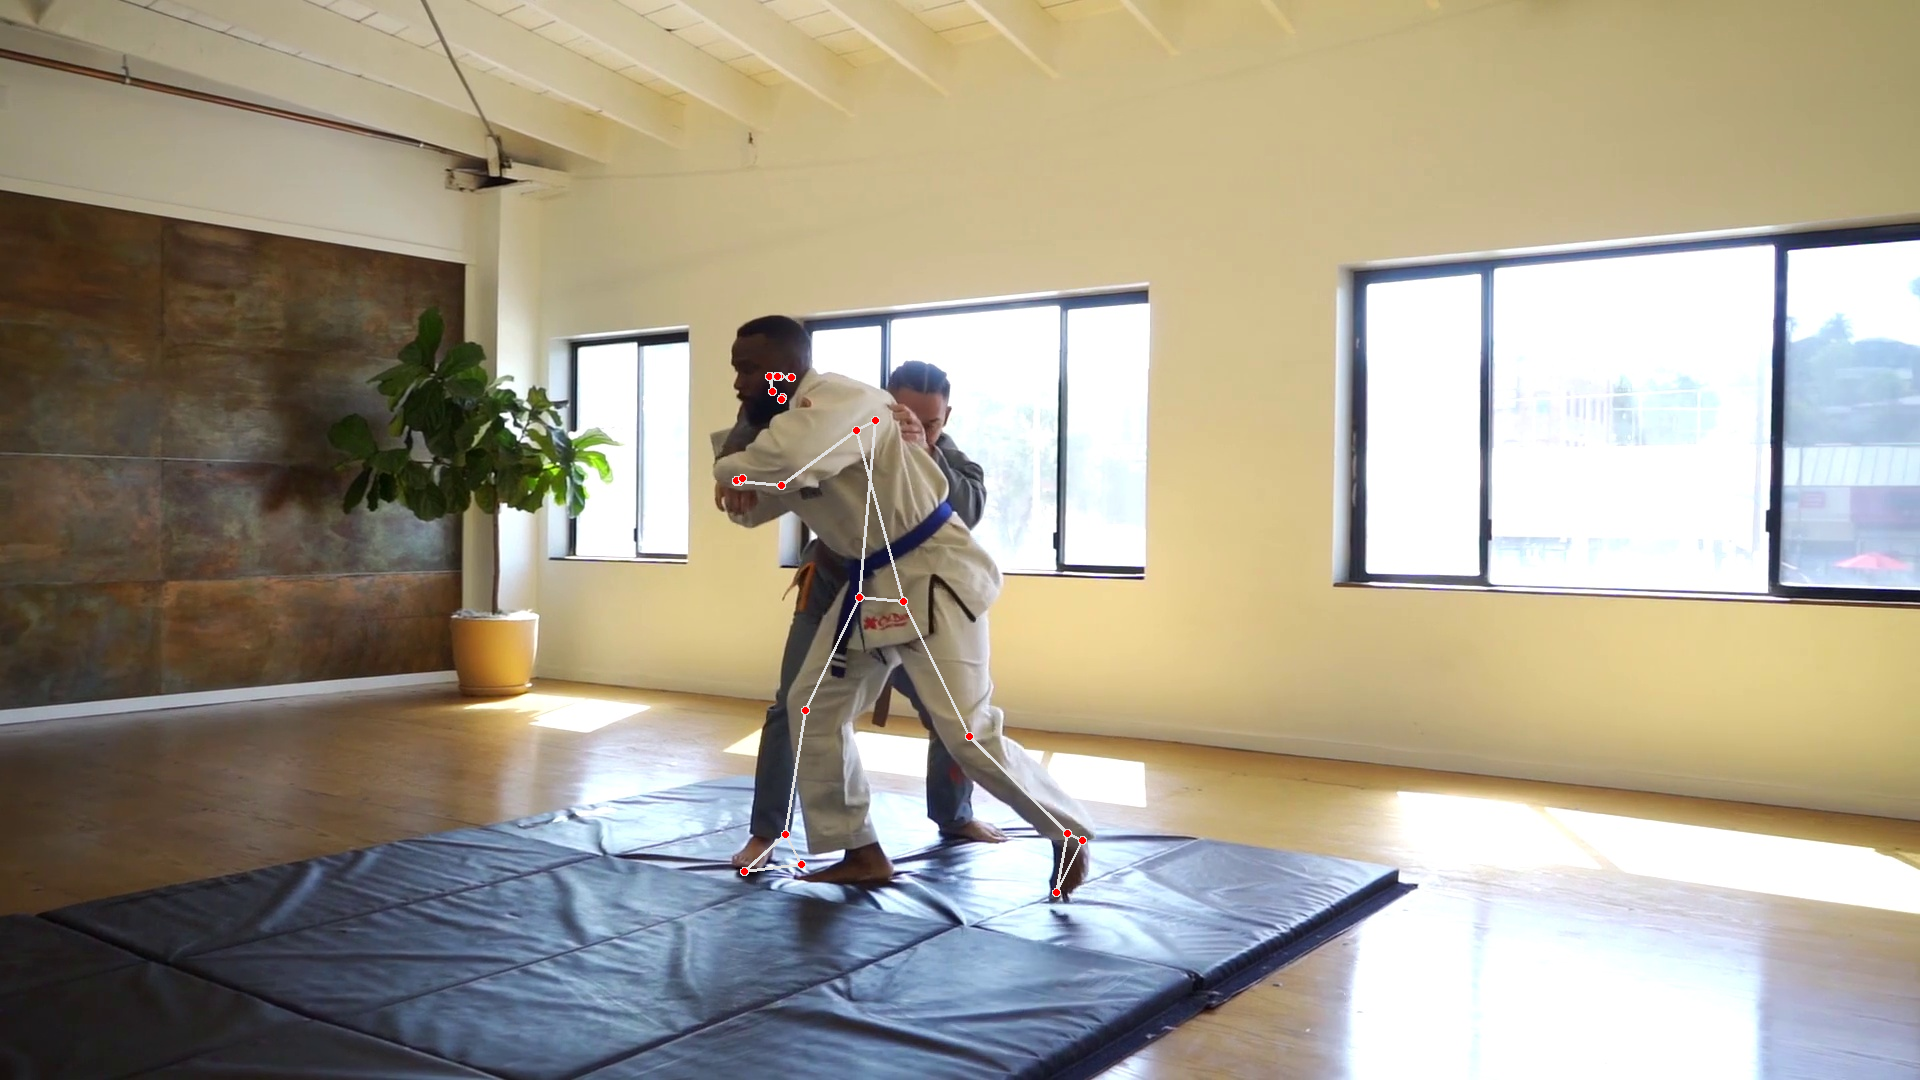

In [15]:
import cv2
import mediapipe as mp

# Initialize MediaPipe Pose
mp_pose = mp.solutions.pose
pose = mp_pose.Pose()
mp_drawing = mp.solutions.drawing_utils

def detect_pose(image):
    # Convert the image to RGB
    image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

    # Process the image and detect poses
    results = pose.process(image_rgb)

    # Draw pose landmarks on the image
    if results.pose_landmarks:
        mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_pose.POSE_CONNECTIONS)

    return image, results.pose_landmarks

# Test the pose detection on a sample frame
# Verify the path to the image
image_path = 'frames/frame_104.jpg'
if not os.path.exists(image_path):
    print(f"Error: Image not found at '{image_path}'")
else:
    sample_frame = cv2.imread(image_path)
    if sample_frame is None:
        print(f"Error: Could not load image '{image_path}'")
    else:
        pose_image, landmarks = detect_pose(sample_frame)

        # Use cv2_imshow from google.colab.patches instead of cv2.imshow
        from google.colab.patches import cv2_imshow  # Import the correct function for Colab
        cv2_imshow(pose_image) # Display the image using cv2_imshow
        # cv2.waitKey(0)  # These functions are not needed in Colab
        # cv2.destroyAllWindows()

In [30]:
def load_data(frames_directory, labels_file, sequence_length):
    """
    Load sequences of keypoints and their corresponding labels.

    Args:
    - frames_directory (str): Directory containing image frames.
    - labels_file (str): File containing labels for each sequence.
    - sequence_length (int): Number of frames per sequence.

    Returns:
    - X_sequences (list): List of keypoint sequences.
    - y_labels (list): List of labels for each sequence.
    """
    X_sequences = []
    y_labels = []

    # Check if the labels file exists
    if not os.path.exists(labels_file):
        print(f"Error: Labels file not found at '{labels_file}'")
        return None, None  # Return None if labels file is not found

    # Load labels
    labels = {}
    with open(labels_file, 'r') as f:
        for line in f:
            filename, label = line.strip().split(',')
            labels[filename] = label

    # Process frames
    filenames = sorted([f for f in os.listdir(frames_directory) if f.endswith('.jpg') or f.endswith('.png')])

    # Collect sequences
    for i in range(0, len(filenames) - sequence_length + 1):
        sequence = []
        for j in range(sequence_length):
            frame_path = os.path.join(frames_directory, filenames[i + j])
            image = cv2.imread(frame_path)
            keypoints = extract_keypoints(image)
            # Handle cases where no keypoints are detected
            if keypoints is not None and len(keypoints) == 66:  # Ensure keypoints are correctly extracted
                sequence.append(keypoints)
            else:
                print(f"Warning: No or incomplete keypoints detected in '{filenames[i + j]}'. Skipping this frame.")
                break  # Stop processing this sequence if a frame has no keypoints

        if len(sequence) == sequence_length:
            # Extract label from the first frame in the sequence
            label = labels.get(filenames[i], 'unknown')
            X_sequences.append(sequence)
            y_labels.append(label)

    return np.array(X_sequences), np.array(y_labels)

# Example usage
frames_directory = '/content/processed_frames'
labels_file = '/content/labels.csv'  # Verify this path
sequence_length = 30

X_sequences, y_labels = load_data(frames_directory, labels_file, sequence_length)

if X_sequences is not None and y_labels is not None:
    print(f"Loaded {len(X_sequences)} sequences with labels.")

Loaded 46 sequences with labels.


In [31]:
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
num_classes=3
X = np.array(X_sequences)  # Shape: (num_samples, sequence_length, num_keypoints)
y = np.array(y_labels)     # Shape: (num_samples,)

# Encode labels as integers
label_encoder = LabelEncoder()
y_encoded = label_encoder.fit_transform(y)

# Convert integer labels to one-hot encoded vectors
y_one_hot = to_categorical(y_encoded, num_classes=num_classes)

# Split data into training and testing sets (e.g., using sklearn's train_test_split)
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y_one_hot, test_size=0.2, random_state=42)

print(f"Training data shape: X_train={X_train.shape}, y_train={y_train.shape}")
print(f"Testing data shape: X_test={X_test.shape}, y_test={y_test.shape}")

Training data shape: X_train=(36, 30, 66), y_train=(36, 3)
Testing data shape: X_test=(10, 30, 66), y_test=(10, 3)


In [34]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
import numpy as np
from sklearn.model_selection import train_test_split

# **Verify the number of keypoints being extracted in the `extract_keypoints` function.**
# **Adjust `num_keypoints` accordingly.**

sequence_length = 30
num_keypoints = 66  # Update based on the actual number of keypoints extracted
num_classes = 3

# Split data into training, validation, and testing sets
X_train, X_temp, y_train, y_temp = train_test_split(X, y_one_hot, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

# Define LSTM model architecture
model = Sequential([
    LSTM(128, input_shape=(sequence_length, num_keypoints), return_sequences=True),
    LSTM(64),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')  # Number of action classes
])

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
model.fit(X_train, y_train, epochs=20, validation_data=(X_val, y_val))

# Predict actions
predictions = model.predict(X_test)

Epoch 1/20


/usr/local/lib/python3.10/dist-packages/keras/src/layers/rnn/rnn.py:204: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


1/1 ━━━━━━━━━━━━━━━━━━━━ 4s 4s/step - accuracy: 0.0000e+00 - loss: 1.1525 - val_accuracy: 1.0000 - val_loss: 0.8854
Epoch 2/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 712ms/step - accuracy: 1.0000 - loss: 0.8885 - val_accuracy: 1.0000 - val_loss: 0.5978
Epoch 3/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 130ms/step - accuracy: 1.0000 - loss: 0.6020 - val_accuracy: 1.0000 - val_loss: 0.3765
Epoch 4/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 105ms/step - accuracy: 1.0000 - loss: 0.3797 - val_accuracy: 1.0000 - val_loss: 0.2352
Epoch 5/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 102ms/step - accuracy: 1.0000 - loss: 0.2368 - val_accuracy: 1.0000 - val_loss: 0.1526
Epoch 6/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 107ms/step - accuracy: 1.0000 - loss: 0.1534 - val_accuracy: 1.0000 - val_loss: 0.1015
Epoch 7/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 155ms/step - accuracy: 1.0000 - loss: 0.1018 - val_accuracy: 1.0000 - val_loss: 0.0693
Epoch 8/20
1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 118ms/step - accuracy: 1.0000 - loss: 0.0694 - val_accuracy: 1.0000 - val_loss: 0.0485
Ep